In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [74]:
from proj1_helpers import *
from implementations import *
from helpers import *
DATA_TRAIN_PATH = 'data/train.csv' # TODO: download train data and supply path here 
prediction, data, ids = load_csv_data(DATA_TRAIN_PATH)

## Do your thing crazy machine learning thing here :) ...

In [194]:
tx, mean_x, std_x = standardize(data)
#y, tx = build_model_data(prediction, x) # TODO: why is this function called??

In [195]:
y.shape

(250000,)

In [196]:
tx.shape

(250000, 30)

### Exploratory Data Analysis

In [3]:
tX.shape

(250000, 30)

In [4]:
y.shape

(250000,)

#### Plots

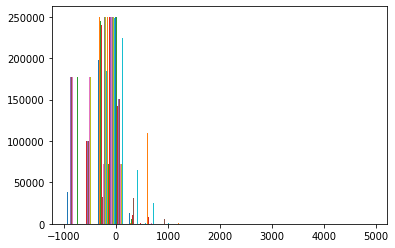

In [6]:
# complete histogram over all features
plt.hist(tX)
plt.show()

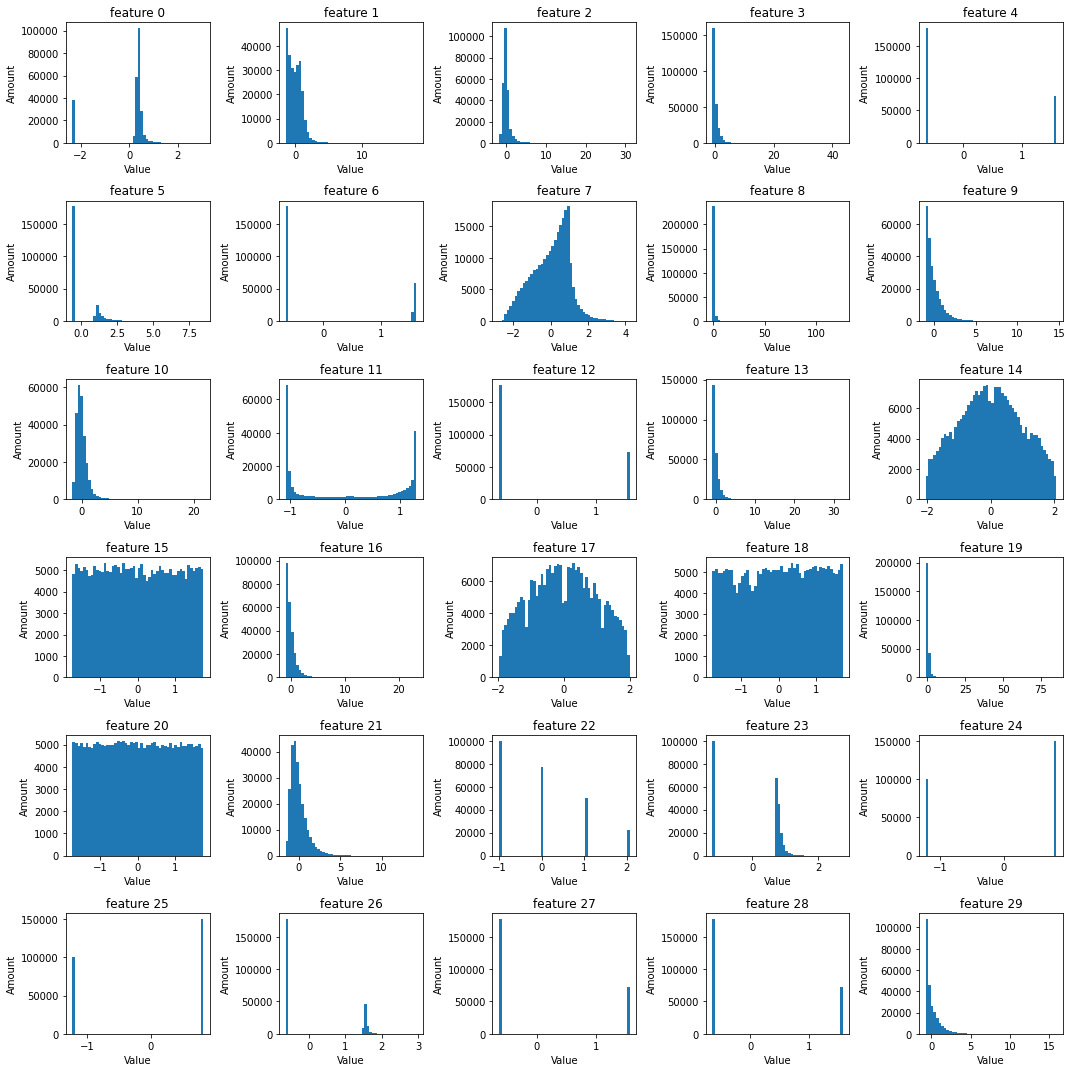

In [203]:
fig, axes = plt.subplots(6, 5, figsize=(15,15))
for i, ax in enumerate(axes.flat):
        ax.hist(tx[:, i], bins=50)
        ax.set_title(f"feature {i}")
        ax.set_xlabel("Value")
        ax.set_ylabel("Amount")
        
fig.tight_layout()
plt.show()

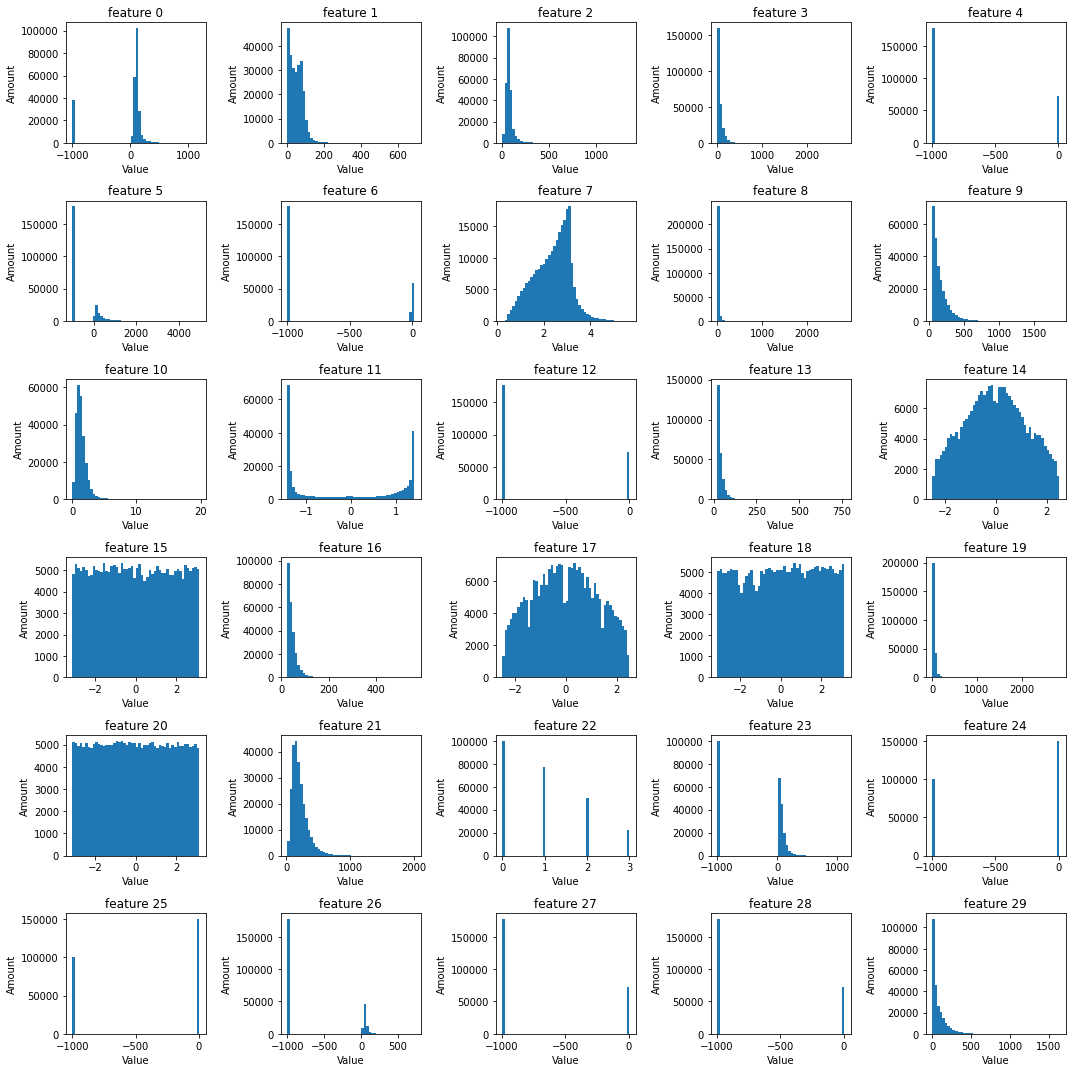

In [19]:
fig, axes = plt.subplots(6, 5, figsize=(15,15))
for i, ax in enumerate(axes.flat):
        ax.hist(tX[:, i], bins=50)
        ax.set_title(f"feature {i}")
        ax.set_xlabel("Value")
        ax.set_ylabel("Amount")
        
fig.tight_layout()
plt.show()

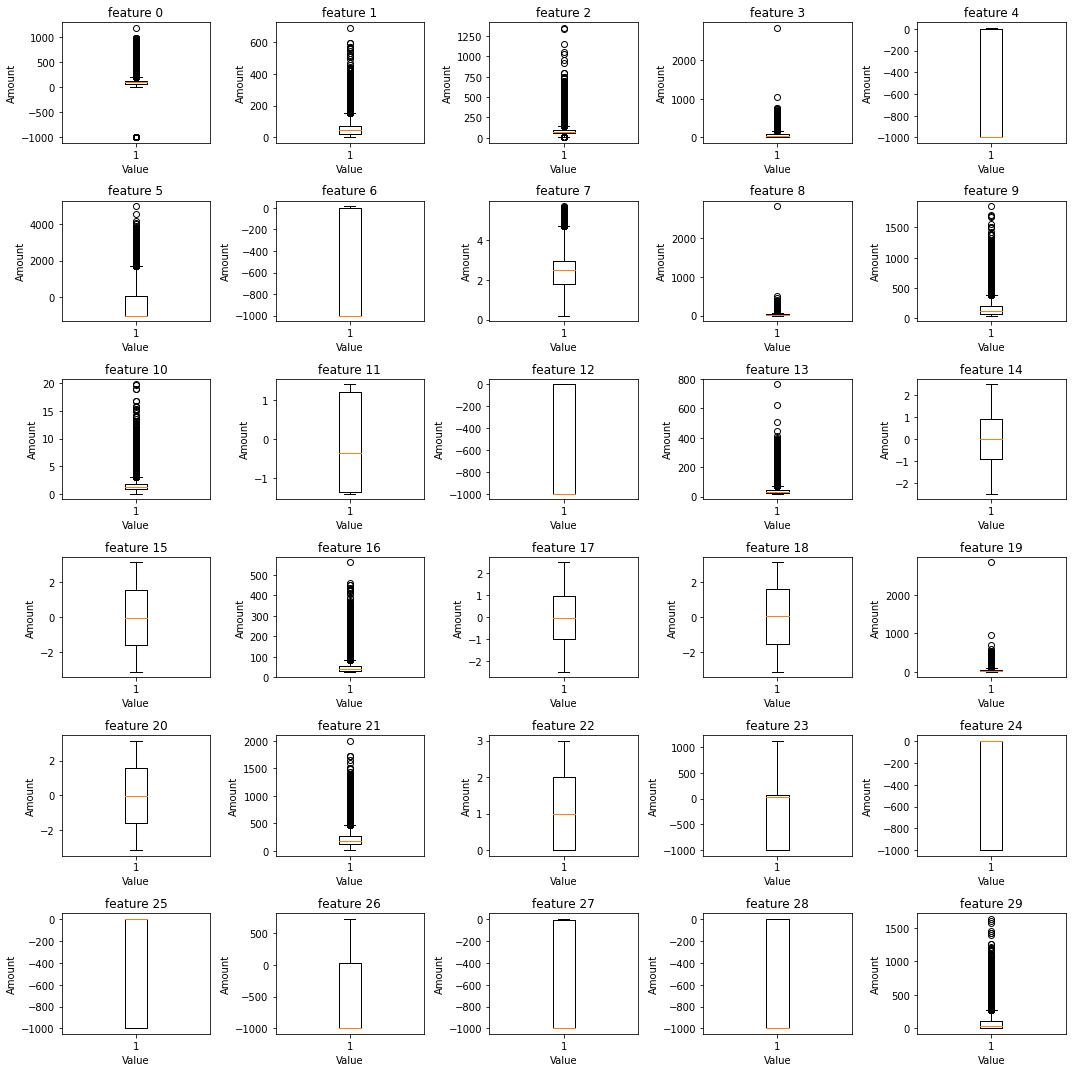

In [24]:
fig, axes = plt.subplots(6, 5, figsize=(15,15))
for i, ax in enumerate(axes.flat):
        ax.boxplot(tX[:, i])
        ax.set_title(f"feature {i}")
        ax.set_xlabel("Value")
        ax.set_ylabel("Amount")
        
fig.tight_layout()
plt.show()

#### Methods

In [197]:
# Least Squares
least_squares_w, least_squares_loss = least_squares(y, tx)
(least_squares_w, least_squares_loss)

(array([ 2.93788269e-02, -2.52531476e-01, -2.54791124e-01, -3.03696823e-02,
        -1.40144785e+00,  2.95701644e-01, -1.07889472e+01,  2.67880862e-01,
        -2.44934981e-03, -3.28813227e+02, -1.82647888e-01,  1.14039626e-01,
         2.05045966e+01,  6.38825636e+01, -3.18961955e-04, -1.80884301e-03,
         6.29917586e+01, -4.48641478e-04,  1.54379278e-03,  1.21462701e-01,
         3.95268800e-04, -6.33223470e-02, -2.06747094e-01, -1.16655776e-01,
         9.86257382e-02,  1.67907622e-01, -3.35146369e-02, -2.98358680e+00,
        -5.36388093e+00,  2.78466802e+02]),
 0.7779046298744484)

In [237]:
# calculate prediction
ypred = predict_labels(least_squares_w, tx)
ypred = np.squeeze(ypred)

(ypred == y).mean()

0.718444

In [199]:
# Gradient Descent
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
initial_w = np.zeros(tx.shape[1])

gradient_w, gradient_loss = least_squares_GD(y, tx, initial_w, max_iters, gamma)

Gradient Descent: execution time=10.614 seconds
Gradient Descend: final loss = 0.7982134856887391


In [200]:
# calculate prediction
ypred = predict_labels(gradient_w, tx)
ypred = np.squeeze(ypred)

(ypred == y).mean()

0.709212

In [235]:
# Stochastic Gradient Descent
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.1

# Initialization
initial_w = np.zeros(tx.shape[1])

sgd_w, sgd_loss = least_squares_SGD(y, tx, initial_w, max_iters, gamma)

SGD: execution time=0.092 seconds
Gradient Descend: final loss = 4.930380657631324e-32


In [236]:
# calculate prediction
ypred = predict_labels(sgd_w, tx)
ypred = np.squeeze(ypred)

(ypred == y).mean()

0.540476

## Generate predictions and save ouput in csv format for submission:

In [10]:
DATA_TEST_PATH = '' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [31]:
OUTPUT_PATH = '' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)